## Inicialização das bibliotecas

In [1]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
from scipy import stats
import glob

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

## Importação dos dados

In [2]:
path = "Datasets"

In [3]:
all_files = glob.glob(path + "/*.txt")

In [4]:
li = []

for filename in all_files:
    year, month = filename[9:14].split("_")
    df = pd.read_csv(filename, sep=';', header=0, encoding='latin-1', index_col=False)
    df["Data"] = pd.to_datetime(f"{month}/{year}", format="%m/%y")
    li.append(df)

In [5]:
df = li[0]

In [6]:
for i in range(1,len(li)):
    df = df.append(li[i], ignore_index=True)

In [7]:
df = df.rename(columns={" Nome": "Nome"})

## Caraterização inicial dos atributos


In [8]:
df['Salário Mensal'] = df['Salário Mensal'].str.replace(',', '.').astype(float)
df['Parcelas Eventuais'] = df['Parcelas Eventuais'].str.replace(',', '.').astype(float)
df['Líquido'] = df['Líquido'].str.replace(',', '.').astype(float)

In [9]:
df.dtypes

Nome                           object
Unid/Orgão                     object
Depto/Setor                    object
Jornada                        object
Categoria                      object
Classe                         object
Ref/MS                         object
Função                         object
Função de Estrutura            object
Tempo USP                       int64
Parcelas Eventuais            float64
Salário Mensal                float64
Líquido                       float64
Data                   datetime64[ns]
dtype: object

## Tratamento da base

In [10]:
df_numerica = df[["Nome", "Tempo USP", "Parcelas Eventuais", "Salário Mensal", "Líquido", "Data"]]

In [11]:
df_numerica

,Nome,Tempo USP,Parcelas Eventuais,Salário Mensal,Líquido,Data
0,Paulo Ernesto Celestini,30,0.00,18727.96,14627.29,2014-09-01
1,Izaura Maria Vieira,30,165.63,8063.76,6491.77,2014-09-01
2,Leia Sicilia,30,14070.05,8394.20,15989.13,2014-09-01
3,Wilma Alexandre,30,0.00,7490.16,5906.40,2014-09-01
4,Julia Deborah Alves Granato Vidal Solda,30,0.00,11417.42,9173.26,2014-09-01
...,...,...,...,...,...,...
2539298,Mauro Kushiama,4,0.00,12403.40,9438.63,2022-10-01
2539299,Gisele Couto de Andrade,2,0.00,10830.69,8173.18,2022-10-01
2539300,Daniella Albino Bezerra Silverio,2,0.00,20882.12,15678.66,2022-10-01
2539301,Suely Villela de Azevedo,1,0.00,11223.87,8406.10,2022-10-01


In [12]:
df_numerica.isnull().values.any()

False

In [13]:
df_numerica = df_numerica[df_numerica['Tempo USP'] != 0]
df_numerica = df_numerica[df_numerica['Salário Mensal'] != 0]
df_numerica = df_numerica[df_numerica['Líquido'] != 0]

In [14]:
(df_numerica['Tempo USP'] == 0).sum()

0

In [15]:
(df_numerica['Salário Mensal'] == 0).sum()

0

In [16]:
(df_numerica['Líquido'] == 0).sum()

0

In [17]:
df_numerica

,Nome,Tempo USP,Parcelas Eventuais,Salário Mensal,Líquido,Data
0,Paulo Ernesto Celestini,30,0.00,18727.96,14627.29,2014-09-01
1,Izaura Maria Vieira,30,165.63,8063.76,6491.77,2014-09-01
2,Leia Sicilia,30,14070.05,8394.20,15989.13,2014-09-01
3,Wilma Alexandre,30,0.00,7490.16,5906.40,2014-09-01
4,Julia Deborah Alves Granato Vidal Solda,30,0.00,11417.42,9173.26,2014-09-01
...,...,...,...,...,...,...
2539297,Vicente D'Andrea,4,0.00,8516.19,6443.03,2022-10-01
2539298,Mauro Kushiama,4,0.00,12403.40,9438.63,2022-10-01
2539299,Gisele Couto de Andrade,2,0.00,10830.69,8173.18,2022-10-01
2539300,Daniella Albino Bezerra Silverio,2,0.00,20882.12,15678.66,2022-10-01


## Avaliação das medidas de localidade


In [ ]:
df_numerica.describe()

,Tempo USP,Parcelas Eventuais,Salário Mensal,Líquido
count,1.934805e+06,1.934805e+06,1.934805e+06,1.934805e+06
mean,1.896914e+01,2.100858e+03,1.055575e+04,8.916258e+03
std,1.098023e+01,4.737886e+03,6.555880e+03,5.550633e+03
min,1.000000e+00,0.000000e+00,3.000000e-02,1.000000e-02
25%,1.000000e+01,0.000000e+00,5.389550e+03,4.747300e+03
50%,1.800000e+01,0.000000e+00,9.062720e+03,7.749890e+03
75%,2.800000e+01,1.916530e+03,1.405928e+04,1.164365e+04
max,5.700000e+01,2.947692e+05,5.790937e+04,2.693800e+05


In [19]:
df_numerica.median()

C:\Users\benny\AppData\Local\Temp/ipykernel_27348/2801813793.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_numerica.median()
C:\Users\benny\AppData\Local\Temp/ipykernel_27348/2801813793.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_numerica.median()


Tempo USP               18.00
Parcelas Eventuais       0.00
Salário Mensal        9062.72
Líquido               7749.89
dtype: float64

In [21]:
df_numerica.cov()

,Tempo USP,Parcelas Eventuais,Salário Mensal,Líquido
Tempo USP,120.565553,5.729396e+03,2.986459e+04,2.275901e+04
Parcelas Eventuais,5729.395526,2.244757e+07,6.331899e+06,1.554998e+07
Salário Mensal,29864.589978,6.331899e+06,4.297956e+07,3.135444e+07
Líquido,22759.010162,1.554998e+07,3.135444e+07,3.080952e+07


In [22]:
df_numerica.corr()

,Tempo USP,Parcelas Eventuais,Salário Mensal,Líquido
Tempo USP,1.000000,0.110132,0.414872,0.373421
Parcelas Eventuais,0.110132,1.000000,0.203854,0.591293
Salário Mensal,0.414872,0.203854,1.000000,0.861639
Líquido,0.373421,0.591293,0.861639,1.000000


<AxesSubplot:xlabel='Data', ylabel='Folha de pagamento'>

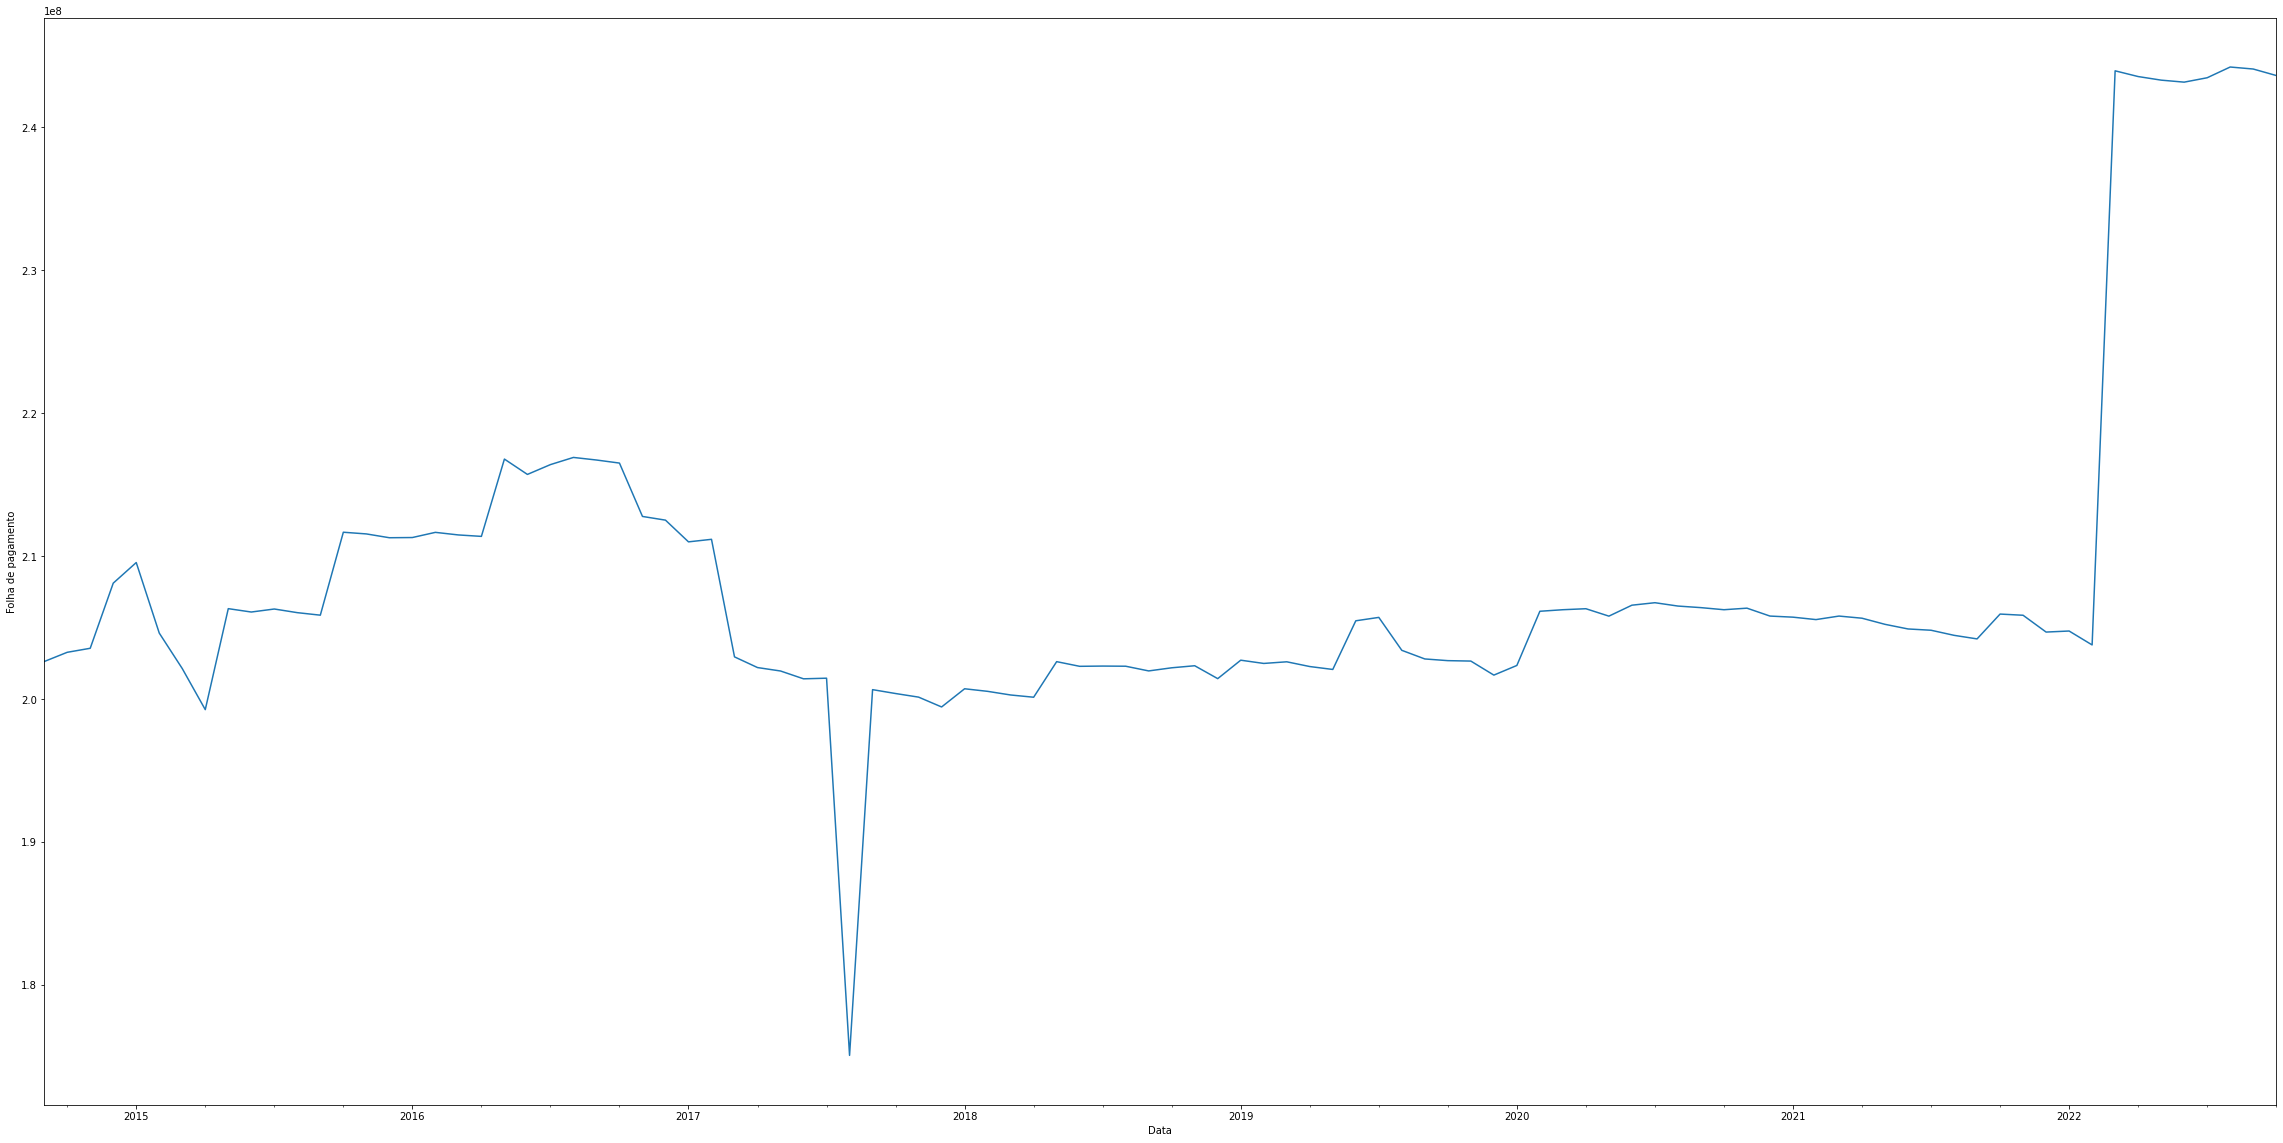

In [34]:
df_numerica.groupby('Data')['Salário Mensal'].sum().plot(xlabel="Data", ylabel= "Folha de pagamento", figsize=(40,20))

In [39]:
df_numerica.to_csv("base_tratada.csv",index=False,encoding='latin-1')

In [41]:
df.to_csv("base_total.csv",index=False,encoding='latin-1')